# Airbnb NYC 2019 - Exploratory Data Analysis (SQL + Python Integrated)

**Author**: Joti Sukheja  
**Date**: 08-April-2025

### 📌 Problem Statement

Airbnb is a global online marketplace for lodging and tourism activities. This analysis aims to uncover patterns and trends in New York City's Airbnb listings using 2019 data. The goal is to derive actionable business insights that can help optimize pricing strategies, improve customer satisfaction, and identify high-potential areas for Airbnb growth.


### 🎯 Objectives

- Identify top hosts by listings and reviews
- Analyze average price by location
- Explore high-demand neighborhoods
- Study the distribution of listings by room type
- Compare price vs. room type
- Discover most popular stay durations
- Examine price vs. length of stay
- Analyze availability and its impact on listings
- Provide recommendations based on insights


### Import Libraries

In [ ]:
import pandas as pd
# import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

### Connect to MySQL

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import getpass  # for secure password input

# Ask user for credentials and connection details
username = input("Enter MySQL username(e.g., root): ")
password = getpass.getpass("Enter MySQL password: ")
host = input("Enter MySQL host (e.g., localhost): ")
port = input("Enter MySQL port (default is 3306): ") or "3306"
database = input("Enter database name:(e.g., airbnb_project)")

# Create SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")


### Load Data

In [4]:
# Use engine in pandas
query = "SELECT * FROM airbnb_nyc_2019"
df = pd.read_sql(query, con=engine)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Exploration

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.shape

(48895, 16)

In [8]:
# Check for Null Values
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# Check for Duplicates
df.duplicated().sum()

np.int64(0)

## Data Cleaning

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.nunique().sort_values()

room_type                             3
neighbourhood_group                   5
calculated_host_listings_count       47
minimum_nights                      109
neighbourhood                       221
availability_365                    366
number_of_reviews                   394
price                               674
reviews_per_month                   937
last_review                        1764
host_name                         11453
longitude                         14718
latitude                          19048
host_id                           37457
name                              47906
id                                48895
dtype: int64

In [12]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
# change data type
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce', format='%Y-%m-%d')

In [14]:
# Handle null values
df.fillna({"name":"unknown"}, inplace=True)
df.fillna({"host_name":"unknown"}, inplace=True)

df.fillna({'last_review': "No Review"}, inplace=True)
df.fillna({'reviews_per_month': 0}, inplace=True)

In [15]:
df.describe(include=[float, int])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Text(0.5, 0, 'Price')

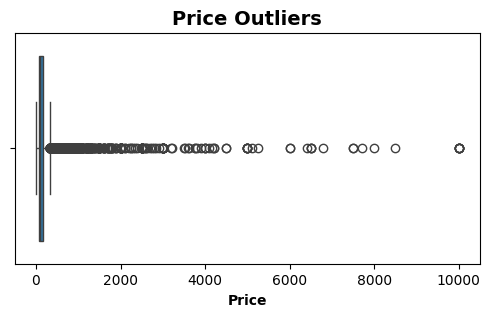

In [16]:
# Identify outliers 
plt.figure(figsize=(6,3))
sns.boxplot(x=df['price'])
plt.title('Price Outliers',fontsize=14, fontweight="bold")
plt.xlabel("Price", fontsize=10, fontweight='bold')

#### > Most listings fall within a reasonable price range, but a few luxury properties significantly raise the max price.

In [17]:
# Remove outliers
price_mean = df['price'].mean()
price_std = df['price'].std()
df = df[df['price'] < (price_mean + 3 * price_std)]

Text(0.5, 0, 'Price')

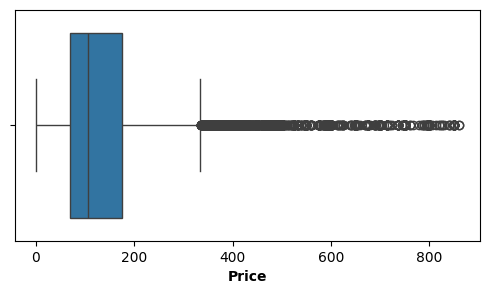

In [18]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['price'])
plt.xlabel("Price", fontsize=10, fontweight='bold')

# EDA!

### Hosts with Most Listings

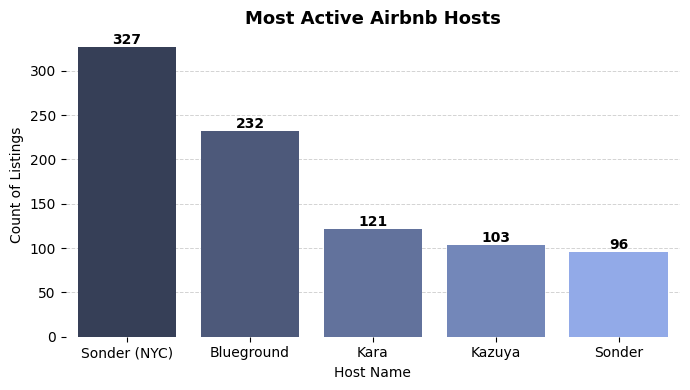

In [19]:
query = """
SELECT host_id, host_name, MAX(calculated_host_listings_count) AS total_listings
FROM airbnb_nyc_2019
GROUP BY host_id, host_name
ORDER BY total_listings DESC
LIMIT 5;
"""
top_hosts = pd.read_sql(query, con=engine)

colors = ["#303c5c", "#455682", "#586ea6", "#6882c4", "#83a4f7"]
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=top_hosts, x="host_name", y="total_listings", hue="host_name", palette=colors, legend=False, zorder=3)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')
# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

ax.yaxis.grid(True, color='lightgray', linestyle='--', linewidth=0.7, zorder=0)
ax.xaxis.grid(False)

plt.xlabel("Host Name", fontsize=10)
plt.ylabel("Count of Listings", fontsize=10)
plt.title("Most Active Airbnb Hosts", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


### Most Reviewed Airbnb Hosts

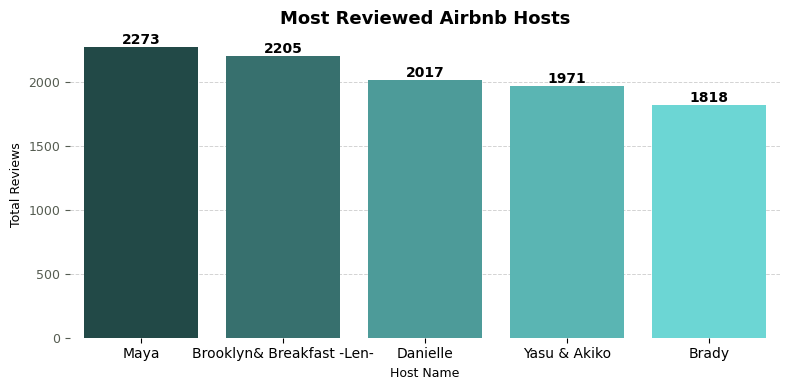

In [20]:
query = """
SELECT host_id, host_name, SUM(number_of_reviews) AS total_reviews
FROM airbnb_nyc_2019
GROUP BY host_id, host_name
ORDER BY total_reviews DESC
LIMIT 5;
"""
top_hosts_reviews = pd.read_sql(query, con=engine) 
top_hosts_reviews['host_name'] = top_hosts_reviews['host_name'].str.replace(r'\s+', ' ', regex=True).str.strip()

colors = ["#1c4f4d", "#2d7a77", "#40a8a5", "#4bc4c1", "#5ae8e5"]
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=top_hosts_reviews, x="host_name", y="total_reviews", hue="host_name", palette=colors, legend=False, zorder=3)

for spine in ax.spines.values():
    spine.set_visible(False)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight=550)

ax.yaxis.grid(True, color='lightgray', linestyle='--', linewidth=0.7, zorder=0)
ax.xaxis.grid(False)

plt.xlabel("Host Name", fontsize=9)
plt.ylabel("Total Reviews", fontsize=9)
ax.tick_params(axis='y', colors='#555c51', labelsize=9)
plt.title("Most Reviewed Airbnb Hosts", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()


### Most Popular Neighborhoods for Listings

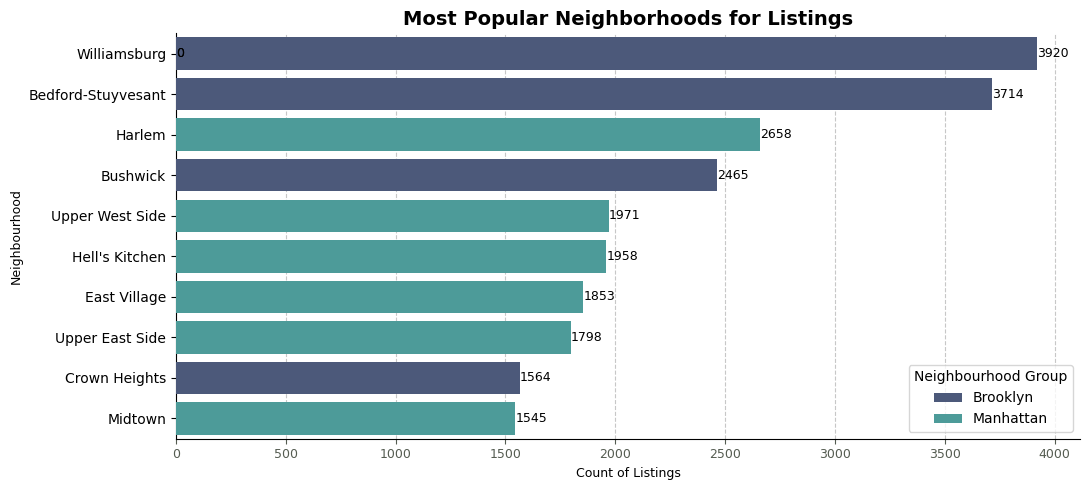

In [21]:
query = """
SELECT neighbourhood, neighbourhood_group, COUNT(id) AS listing_count
FROM airbnb_nyc_2019
GROUP BY neighbourhood, neighbourhood_group
ORDER BY listing_count DESC
LIMIT 10;
"""
neighbourhood_cnt = pd.read_sql(query, con=engine)
colors = ["#455681", "#40a8a5"]
plt.figure(figsize=(11, 5))
ax = sns.barplot(data=neighbourhood_cnt, y="neighbourhood", x="listing_count", hue="neighbourhood_group", palette=colors, zorder=3)

for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(width + 1, y, f'{int(width)}', va='center', fontsize=9, fontweight=530)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis='x', linestyle='--', alpha=0.7, zorder=0)

plt.title("Most Popular Neighborhoods for Listings", fontsize=14, fontweight="bold")
plt.xlabel("Count of Listings", fontsize=9)
plt.ylabel("Neighbourhood", fontsize=9)
ax.tick_params(axis='x', colors='#555c51', labelsize=9)
plt.legend(title="Neighbourhood Group")
plt.tight_layout()
plt.show()


### Most Expensive Neighborhoods

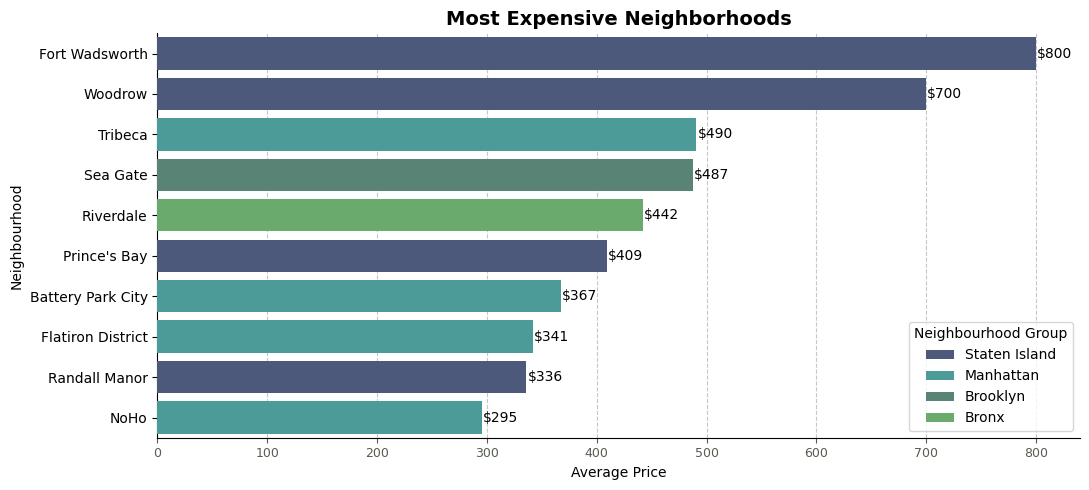

In [22]:
query = """
SELECT neighbourhood, neighbourhood_group, AVG(price) AS avg_price
FROM airbnb_nyc_2019
GROUP BY neighbourhood, neighbourhood_group
ORDER BY avg_price DESC
LIMIT 10;
"""
neighbourhood_cnt = pd.read_sql(query, con=engine) 
colors = ["#455681", "#40a8a5", "#518a77", "#60b563"]
plt.figure(figsize=(11, 5))
ax = sns.barplot(data=neighbourhood_cnt, y="neighbourhood", x="avg_price", hue="neighbourhood_group", palette=colors, zorder=3)

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        y = p.get_y() + p.get_height() / 2
        ax.text(width + 1, y, f'${int(width)}', va='center', fontsize=10, fontweight=540)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis='x', linestyle='--', alpha=0.7, zorder=0)

plt.title("Most Expensive Neighborhoods", fontsize=14, fontweight="bold")
plt.xlabel("Average Price", fontsize=10)
ax.tick_params(axis='x', colors='#555c51', labelsize=9)
plt.ylabel("Neighbourhood", fontsize=10)
plt.legend(title="Neighbourhood Group")
plt.tight_layout()
plt.show()


### Average Price per Neighbourhood Group

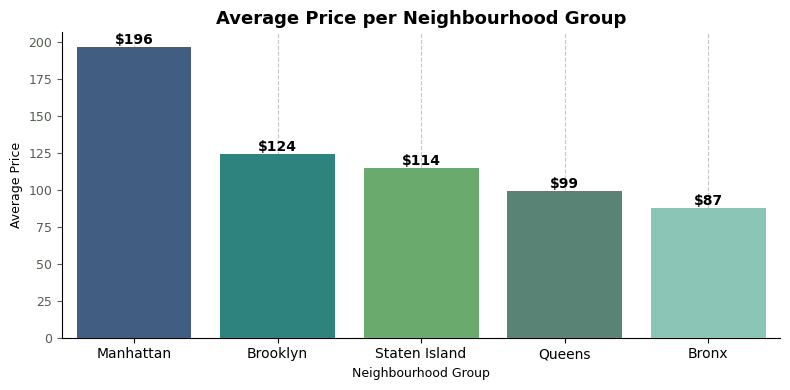

In [23]:
query = """
SELECT neighbourhood_group, AVG(price) AS avg_price
FROM airbnb_nyc_2019
GROUP BY neighbourhood_group
ORDER BY avg_price DESC;
"""

price_per_neighgrp = pd.read_sql(query, con=engine)

colors = ["#80cfba", "#518a77", "#60b563", "#21918c", "#365D8DFF"]
plt.figure(figsize=(8, 4))
ax = sns.barplot(x="neighbourhood_group", y="avg_price", data=price_per_neighgrp, hue = "avg_price", palette=colors,zorder=3)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'${int(height)}', 
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis='x', linestyle='--', alpha=0.7, zorder=0)


plt.title("Average Price per Neighbourhood Group", fontsize=13, fontweight='bold')
plt.xlabel("Neighbourhood Group", fontsize=9)
plt.ylabel("Average Price", fontsize=9)
ax.tick_params(axis='y', colors='#555c51', labelsize=9)
ax.tick_params(axis='x', labelsize=10)
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()


### Listings Categorized by Room Type

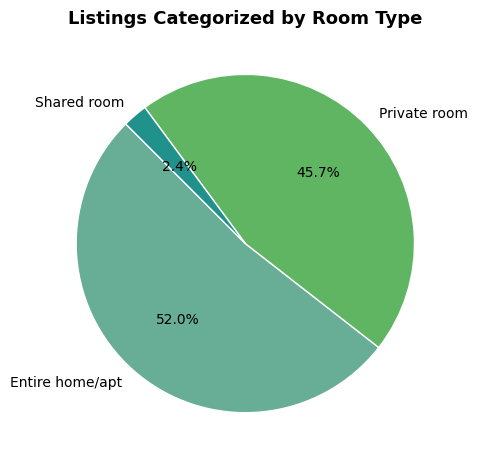

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# SQL query
query = """
SELECT room_type, COUNT(*) AS listing_count
FROM airbnb_nyc_2019
GROUP BY room_type
ORDER BY listing_count DESC;
"""
room_type_counts = pd.read_sql(query, con=engine)

# Pie chart
plt.figure(figsize=(5, 5))
colors = ["#68ad96", "#60b563","#21918c", "#365D8DFF"]

plt.pie(
    room_type_counts['listing_count'],
    labels=room_type_counts['room_type'],
    autopct='%1.1f%%',    # Just percentage, no counts
    startangle=135,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)


plt.title("Listings Categorized by Room Type", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


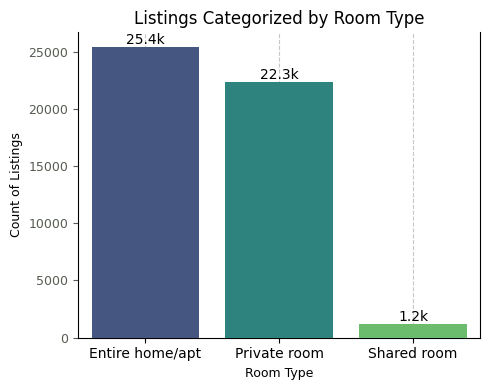

In [25]:

query = """
SELECT room_type, COUNT(*) AS listing_count
FROM airbnb_nyc_2019
GROUP BY room_type
ORDER BY listing_count DESC;
"""
room_type_counts = pd.read_sql(query, con=engine)
plt.figure(figsize=(5, 4))
ax = sns.barplot(data=room_type_counts, x="room_type", y="listing_count", hue="room_type", palette="viridis", zorder=3)

for p in ax.patches:
    height = p.get_height()
    label = f'{height/1000:.1f}k' if height >= 1000 else f'{int(height)}'
    ax.annotate(label, 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, fontweight=540)

ax.spines['top'].set_visible(False)


ax.grid(axis='x', linestyle='--', alpha=0.7, zorder=0)

plt.title("Listings Categorized by Room Type", fontsize=12, fontweight=545)
plt.xlabel("Room Type", fontsize=9)
plt.ylabel("Count of Listings", fontsize=9)
ax.tick_params(axis='y', colors='#555c51', labelsize=9)
plt.tight_layout()
plt.show()


### Price Distribution by Room Type

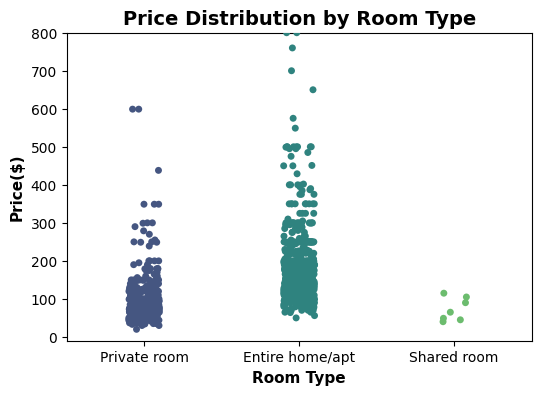

In [26]:
query = """
SELECT room_type, price
FROM airbnb_nyc_2019
WHERE price IS NOT NULL
LIMIT 1000;
"""

price_room_df = pd.read_sql(query, con=engine)

plt.figure(figsize=(6,4))
colors = ["#455681", "#2f837f", "#6cbc6e"]
sns.stripplot(x='room_type', y='price', data=price_room_df, palette=colors,
              hue='room_type', marker='o', dodge=False, alpha=1)
ax.grid(axis='y', linestyle=(0, (5, 5)), alpha=0.7)


plt.title("Price Distribution by Room Type", fontsize=14, fontweight="bold")
plt.xlabel("Room Type", fontsize=11, fontweight='bold')
plt.ylabel("Price($)", fontsize=11, fontweight='bold')

plt.ylim(-10,800)
plt.show()


### Most Popular Lengths of Stay

C:\Users\Villayat\AppData\Local\Temp\ipykernel_18000\289665935.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular_stays, x='minimum_nights', y='count', palette='coolwarm')
C:\Users\Villayat\AppData\Local\Temp\ipykernel_18000\289665935.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Villayat\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


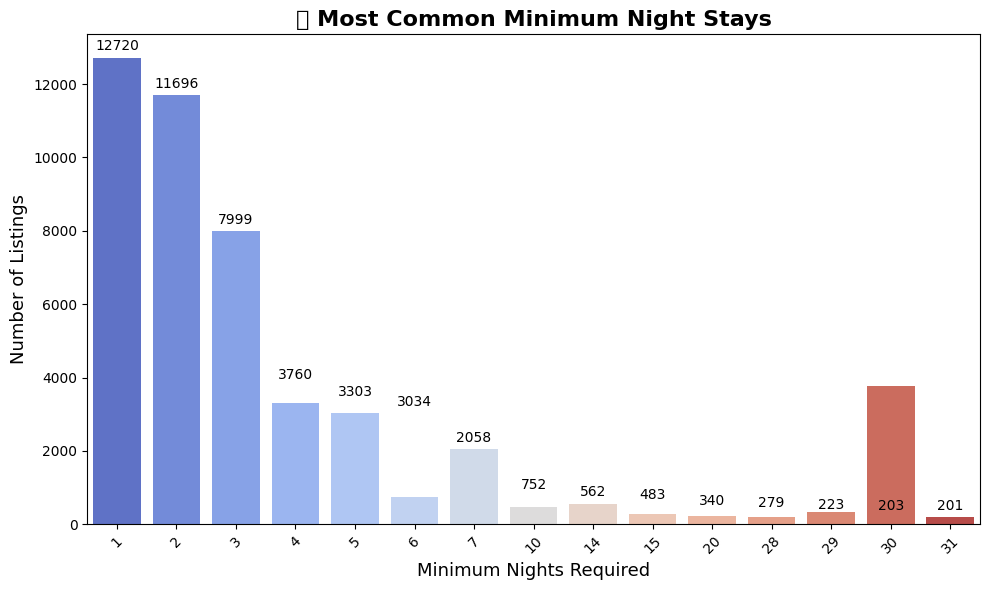

In [27]:
query30 = """
SELECT minimum_nights, COUNT(*) AS count
FROM airbnb_nyc_2019
GROUP BY minimum_nights
ORDER BY count DESC
LIMIT 15;
"""
popular_stays = pd.read_sql(query30, con=engine)
popular_stays

plt.figure(figsize=(10,6))
sns.barplot(data=popular_stays, x='minimum_nights', y='count', palette='coolwarm')

plt.title('📊 Most Common Minimum Night Stays', fontsize=16, weight='bold')
plt.xlabel('Minimum Nights Required', fontsize=13)
plt.ylabel('Number of Listings', fontsize=13)
plt.xticks(rotation=45)

# Show value labels
for i, row in popular_stays.iterrows():
    plt.text(i, row['count'] + 200, row['count'], ha='center', fontsize=10)

plt.tight_layout()
plt.show()


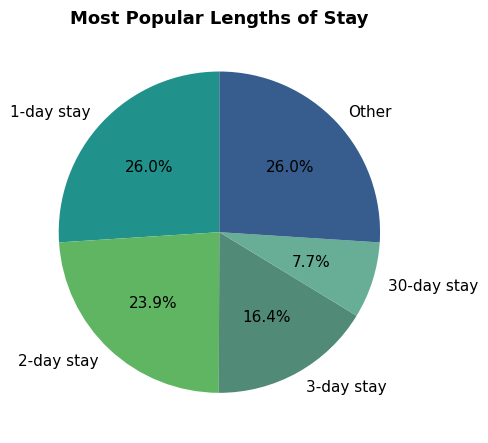

In [28]:
query = """
SELECT minimum_nights, COUNT(*) AS count
FROM airbnb_nyc_2019
GROUP BY minimum_nights
ORDER BY count DESC;
"""
stay_nights_df = pd.read_sql(query, con=engine)

top_stays = stay_nights_df.head(4).copy()
other_sum = stay_nights_df['count'].iloc[4:].sum()

other_row = pd.DataFrame({'minimum_nights': ['Other'], 'count': [other_sum]})
top_stays = pd.concat([top_stays, other_row], ignore_index=True)
labels = [f"{str(night)}-day stay" if night != 'Other' else 'Other' for night in top_stays['minimum_nights']]
colors = ["#21918c", "#60b563", "#518a77", "#68ad96", "#365D8DFF"]

plt.figure(figsize=(5,5))
plt.pie(top_stays['count'], labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 11, 'weight': 540})
plt.title("Most Popular Lengths of Stay", fontsize=13, fontweight='bold')
plt.ylabel('')  
plt.tight_layout()
plt.show()


### Price vs. Stay Durations

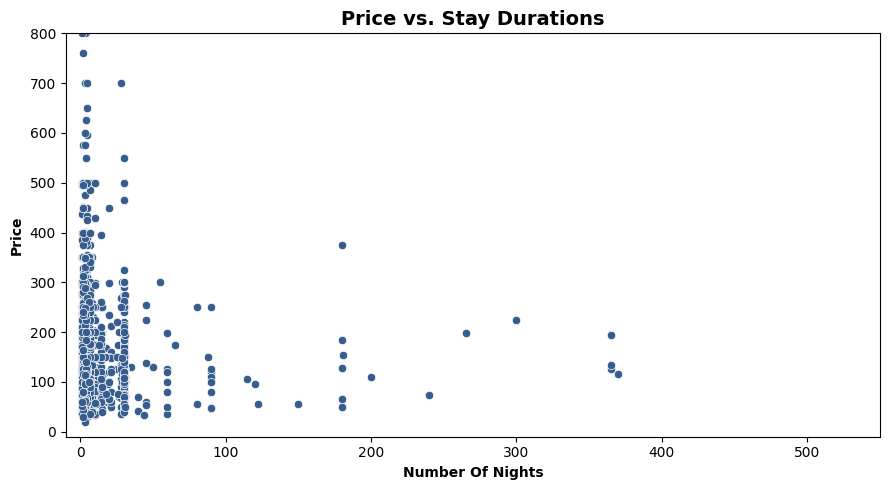

In [29]:
query = """
SELECT minimum_nights, price
FROM airbnb_nyc_2019
WHERE price IS NOT NULL AND minimum_nights IS NOT NULL
LIMIT 2000;  -- increase/decrease for performance
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from SQL
stay_price_df = pd.read_sql(query, con=engine)

# Clean data: remove outliers or invalid values
stay_price_df = stay_price_df[(stay_price_df['price'] > 0) & (stay_price_df['minimum_nights'] >= 0) & (stay_price_df['minimum_nights'] <= 550)]

plt.figure(figsize=(9, 5))

sns.scatterplot(x='minimum_nights', y='price', data=stay_price_df, color="#365D8DFF")

plt.title("Price vs. Stay Durations", fontsize=14, fontweight='bold')
plt.xlabel("Number Of Nights", fontsize=10, fontweight='bold')
plt.ylabel("Price", fontsize=10, fontweight='bold')
plt.xlim(-10, 550)
plt.ylim(-10, 800)
plt.tight_layout()
plt.show()
